In [1]:
import numpy as np
import pandas as pd
#import cv2
import scipy.io as sio
import matplotlib.pyplot as plt

# Load the Face Data

In [2]:
face_mat = sio.loadmat('face(1).mat')

face_x = face_mat['X'].T
face_l = face_mat['l'].T

facexdf = pd.DataFrame(face_x)
faceldf = pd.DataFrame(face_l)

# Scale the Data

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

X_std = StandardScaler().fit_transform(face_x)
X_norm = Normalizer().fit_transform(face_x)

/Users/mikhaildemtchenko/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Split the Data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(face_x, face_l, test_size=0.2)

In [49]:
face_xdf = pd.DataFrame(face_x)

In [59]:
face_l.nunique


AttributeError: 'numpy.ndarray' object has no attribute 'nunique'

In [60]:
face_ldf = pd.DataFrame(face_l)

In [62]:
face_ldf.ix[:,0].nunique

/Users/mikhaildemtchenko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


<bound method IndexOpsMixin.nunique of 0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      2
19      2
20      3
21      3
22      3
23      3
24      3
25      3
26      3
27      3
28      3
29      3
       ..
490    50
491    50
492    50
493    50
494    50
495    50
496    50
497    50
498    50
499    50
500    51
501    51
502    51
503    51
504    51
505    51
506    51
507    51
508    51
509    51
510    52
511    52
512    52
513    52
514    52
515    52
516    52
517    52
518    52
519    52
Name: 0, Length: 520, dtype: uint8>

In [56]:
x_traindf = pd.DataFrame(X_train)
x_traindf.shape

(416, 2576)

# Average Face

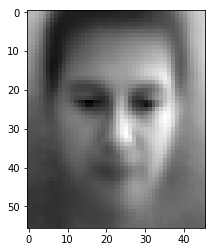

In [5]:
X_traindf = pd.DataFrame(X_train)
Av = X_traindf.mean()
Av = np.array(Av)
Avimg = Av.reshape(46,56)
plt.imshow(Avimg.T, cmap=plt.cm.gray)

In [6]:
#X_train = X_train.T

mean_vec = np.mean(X_train, axis=0)
cov_mat = (X_train - mean_vec).T.dot((X_train - mean_vec)) / (X_train.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[2709.12877085 2536.83871061 2332.54677363 ... -458.27527224
  -515.13942308 -507.67769347]
 [2536.83871061 2789.44383109 2650.60490616 ... -480.60087465
  -539.32797729 -538.24606696]
 [2332.54677363 2650.60490616 2791.6644057  ... -520.71598123
  -571.83140639 -564.08332368]
 ...
 [-458.27527224 -480.60087465 -520.71598123 ... 3039.43613879
  2926.54957136 2781.14722544]
 [-515.13942308 -539.32797729 -571.83140639 ... 2926.54957136
  3166.43334106 3023.21215246]
 [-507.67769347 -538.24606696 -564.08332368 ... 2781.14722544
  3023.21215246 3109.99026297]]
Eigenvectors 
[[ 0.01328862+0.j         -0.01302579+0.j          0.01933377+0.j
  ... -0.00138435-0.00157556j -0.00138435+0.00157556j
   0.00283414+0.j        ]
 [ 0.01415749+0.j         -0.01303405+0.j          0.02109465+0.j
  ...  0.00094496-0.00024305j  0.00094496+0.00024305j
   0.00050261+0.j        ]
 [ 0.01477323+0.j         -0.01296012+0.j          0.02295605+0.j
  ...  0.00092845-0.00076233j  0.00092845+0

In [109]:
X_trainT = X_train.T

mean_vec = np.mean(X_trainT, axis=0)
cov_mat = (X_trainT - mean_vec).T.dot((X_trainT - mean_vec)) / (X_trainT.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[1140.19072544  467.51062172  800.42241331 ...  575.28307423
   672.74431767  578.15255985]
 [ 467.51062172 1637.28497859  310.40216366 ...  508.80396551
   107.02712658  420.43752276]
 [ 800.42241331  310.40216366 1871.46531207 ...  567.68328017
  1030.23022885  637.24610957]
 ...
 [ 575.28307423  508.80396551  567.68328017 ... 2025.65706069
   441.85630239  749.97011141]
 [ 672.74431767  107.02712658 1030.23022885 ...  441.85630239
  1836.53206039  585.4465647 ]
 [ 578.15255985  420.43752276  637.24610957 ...  749.97011141
   585.4465647  2248.97178541]]
Eigenvectors 
[[ 0.03849603 -0.05797049 -0.03150342 ...  0.01485442 -0.00914391
   0.00431764]
 [ 0.05540389  0.01136773  0.02819161 ...  0.0078626   0.00709647
   0.00325249]
 [ 0.03993053 -0.05200218 -0.04533547 ...  0.03718685  0.03545649
   0.05111938]
 ...
 [ 0.043559   -0.02338899  0.05443362 ... -0.03560105  0.08112435
   0.00365661]
 [ 0.02637446 -0.07216318 -0.03966509 ...  0.0635592  -0.02827416
   0.092

In [15]:
u,s,v = np.linalg.svd(cov_mat)

In [11]:

eig_vals2, eig_vecs2 = np.linalg.eig(np.cov(X_train))

In [129]:
import matplotlib.pyplot as plt

In [20]:
(eig_vals - s).mean()

(-4.906758574944175e-11-3.1358445921829037e-30j)

/Users/mikhaildemtchenko/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


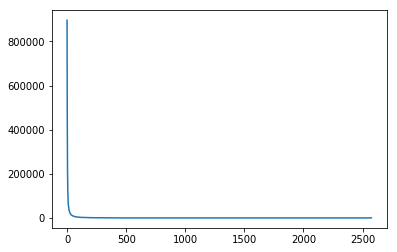

In [12]:
plt.plot(eig_vals)
plt.show()

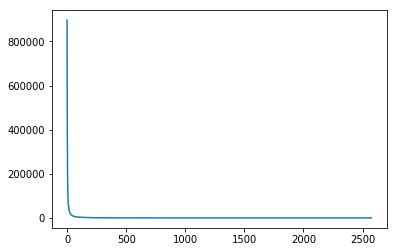

In [16]:
plt.plot(s)
plt.show()

In [28]:
n = 0
for i in eig_vals:
    if i > 10000:
        n=n+1
print (n)

47


5


In [126]:
eig_vals.mean()

1929.6368341923817

In [71]:
v

array([[ 0.00272472, -0.05232273,  0.00507518, ...,  0.01048841,
         0.06046822,  0.05171444],
       [-0.06366913,  0.02135852, -0.02390869, ..., -0.00517347,
         0.03801465, -0.04323993],
       [ 0.0750373 , -0.00906869, -0.0554415 , ...,  0.00550961,
        -0.07595797,  0.05119638],
       ...,
       [-0.00189958, -0.06196623, -0.00934349, ...,  0.01327888,
        -0.0016775 ,  0.00041525],
       [ 0.00143283,  0.04504269, -0.00117751, ..., -0.00548555,
         0.00817266,  0.02861482],
       [-0.04798781, -0.0424229 , -0.04605623, ..., -0.04091853,
        -0.06373527, -0.03429449]])

# Performing PCA

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(face_x, face_l, test_size=0.2)

In [67]:
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure(figsize=(20,20))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())


 
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]][-1]
        true_name = target_names[y_test[i]][-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)

In [64]:
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(face_x, face_l, test_size=0.2)

n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred))





Iteration 1, loss = 4.00151273
Validation score: 0.023810
Iteration 2, loss = 3.54202269
Validation score: 0.166667
Iteration 3, loss = 3.15100853
Validation score: 0.214286
Iteration 4, loss = 2.78073195
Validation score: 0.285714
Iteration 5, loss = 2.43460218
Validation score: 0.333333
Iteration 6, loss = 2.10996942
Validation score: 0.476190
Iteration 7, loss = 1.80978489
Validation score: 0.523810
Iteration 8, loss = 1.53280750
Validation score: 0.571429
Iteration 9, loss = 1.28576807
Validation score: 0.619048
Iteration 10, loss = 1.06693963
Validation score: 0.619048
Iteration 11, loss = 0.87730010
Validation score: 0.666667
Iteration 12, loss = 0.71431372
Validation score: 0.738095
Iteration 13, loss = 0.58116957
Validation score: 0.761905
Iteration 14, loss = 0.46980518
Validation score: 0.809524
Iteration 15, loss = 0.37768697
Validation score: 0.833333
Iteration 16, loss = 0.30554932
Validation score: 0.833333
Iteration 17, loss = 0.24645505
Validation score: 0.833333
Iterat

/Users/mikhaildemtchenko/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mikhaildemtchenko/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


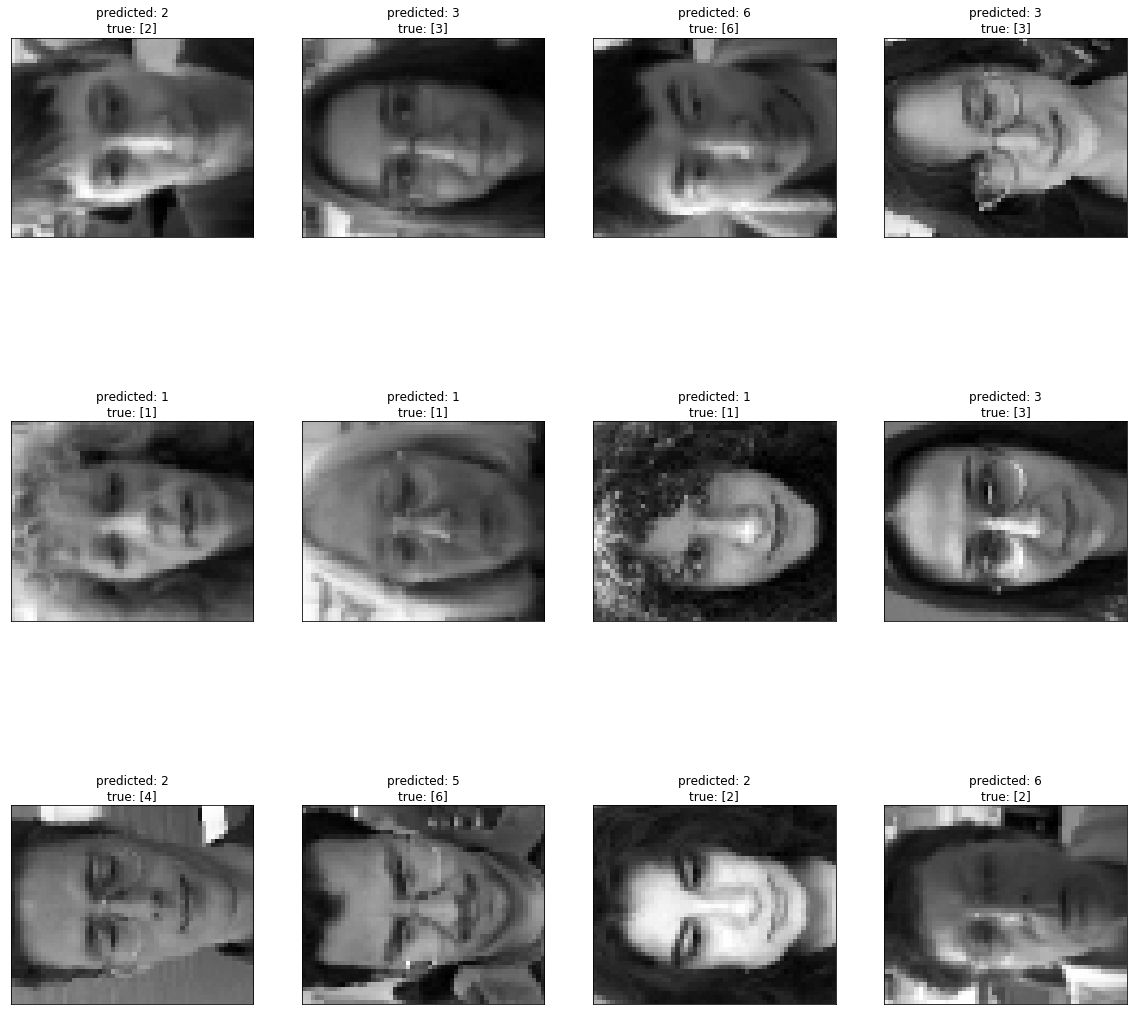

In [68]:
prediction_titles = list(titles(y_pred, y_test, face_l))
plot_gallery(X_test, prediction_titles, 46, 56)






# Nearest Neighbour

In [15]:
from sklearn import neighbors

In [44]:
n_components = 100
pca = PCA(n_components=n_components).fit(X_train.T)
print(pca.explained_variance_ratio_)

# Transform images with pca model
X_train2 = pca.transform(X_train.T)
X_test2 = pca.transform(X_test.T)

# Make an instance of knn model
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train2.T, y_train.T)

# Accuracy of knn test
accuracy = knn.score(X_test2.T, y_test.T)
y_pred2 = knn.predict(X_train2.T)
print(y_predict)
print(accuracy)

[0.30792853 0.10834262 0.09275151 0.04637755 0.04438518 0.02826408
 0.02654928 0.02177304 0.01684282 0.01414283 0.01287925 0.01159076
 0.01070577 0.00956955 0.0086529  0.00812373 0.00725366 0.00682517
 0.00644278 0.00611606 0.0055517  0.00533125 0.00518325 0.00464508
 0.00457727 0.00449248 0.00417719 0.00387033 0.00368609 0.00355699
 0.00354809 0.00328181 0.00324038 0.00308392 0.00281394 0.00280122
 0.0026063  0.00254657 0.002482   0.00241774 0.00237295 0.00221854
 0.00217959 0.00208455 0.00206082 0.00204623 0.00196596 0.00190585
 0.00185242 0.00181963 0.0017948  0.00169177 0.00162505 0.00160992
 0.00158262 0.00156297 0.00148974 0.00144209 0.00142578 0.00137914
 0.00136219 0.00134287 0.00129501 0.00127217 0.00124838 0.00122254
 0.00119912 0.00115961 0.00113699 0.00111169 0.0010926  0.00106982
 0.00104533 0.00102402 0.00101119 0.00098446 0.00098119 0.00095018
 0.00094424 0.00092852 0.00092115 0.00089949 0.000858   0.00084623
 0.00082808 0.00081763 0.00080216 0.00078074 0.00076446 0.0007

ValueError: operands could not be broadcast together with shapes (2576,104) (416,) 

In [42]:
y_pred

array([28, 44, 46, 45, 46, 26, 39, 19,  7, 37, 42,  9, 35, 47, 41, 14, 45,
       15, 10, 44, 32,  4, 51,  6, 18, 18,  4, 36,  8, 47, 22, 34, 17, 35,
       32, 47,  5,  2, 50, 11, 52, 16, 32,  6, 26, 22, 49, 10, 24, 50,  7,
       38,  8, 24, 21, 47,  1,  4, 30,  9, 47, 21, 51, 31, 25, 35,  3, 15,
       46,  5, 19, 33, 15, 36, 20,  6, 37, 19, 48, 18, 18, 10, 28, 28,  9,
       51, 15, 51,  6, 43, 37, 25, 12, 17,  7, 35, 35, 28,  2, 31,  6, 51,
       22, 40], dtype=uint8)

In [40]:
y_pred2

array([27, 40, 26,  7, 28, 29, 44, 38, 39, 28, 25, 47, 13, 51, 28, 45, 16,
       25, 13, 15, 48,  6, 29, 35,  3, 21,  3, 34, 38, 32,  4, 44, 45,  1,
       27, 29, 12,  5,  5,  8,  3, 37, 27, 34,  7, 13, 51, 10, 28, 35,  8,
        4, 27, 48,  2, 20, 20, 11, 17, 29, 23, 23, 27, 17, 46, 10, 12, 29,
       10, 24, 12, 17,  3, 26,  6, 21, 14,  4,  9,  9, 10, 10, 18, 29, 32,
        7, 40, 17, 10,  7,  8, 15, 21, 13, 11, 48, 21, 36, 46, 11, 18, 38,
       36, 34, 28, 29, 36, 27,  1, 45, 24, 51, 20, 26, 43, 23, 35, 20, 35,
       29, 26, 32,  4, 15, 33, 46, 37,  1, 52,  3,  1, 39,  8, 31, 29, 29,
       12,  5, 29, 16, 16, 26, 26,  4, 33,  9, 29, 37, 33,  1,  8, 31,  1,
       15, 13, 27, 39, 29, 34, 41, 31, 39, 10, 23, 11, 28, 45, 23, 11, 36,
        9, 43, 16, 33, 16,  5, 46,  1, 32, 17, 27,  5,  3, 31, 26, 12,  3,
       35, 13, 21, 28,  6, 48, 34,  9, 33, 23, 15, 37, 41,  4, 27, 40, 29,
       15, 25, 33, 33, 22, 50, 29, 39, 48, 29, 36, 29, 10, 10, 20,  6, 11,
       47,  1, 35, 29, 51

In [39]:
prediction_titles = list(titles(y_pred2, y_test, face_l))
plot_gallery(X_test, prediction_titles, 46, 56)

IndexError: index 104 is out of bounds for axis 0 with size 104

In [ ]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

In [ ]:
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Face Reconstruction

In [38]:
face_mat = sio.loadmat('face(1).mat')

face_x = face_mat['X'].T
face_l = face_mat['l'].T

facexdf = pd.DataFrame(face_x)
faceldf = pd.DataFrame(face_l)

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(face_x, face_l, test_size=0.2)

FileNotFoundError: [Errno 2] No such file or directory: 'face.mat'

In [42]:
n_bases = 64

pca = PCA(n_bases) 
X_proj = pca.fit_transform(X_train) 
print (X_proj.shape)
print(np.cumsum(pca.explained_variance_ratio_))

(416, 64)
[0.20353292 0.32564346 0.42497401 0.48318199 0.53315136 0.56602963
 0.59610428 0.62033009 0.6413089  0.66078834 0.67462491 0.68813753
 0.70043388 0.71178525 0.72294708 0.73247651 0.740799   0.74890587
 0.75666108 0.7640911  0.77100488 0.77713393 0.78308983 0.78880792
 0.79408999 0.79915204 0.80405313 0.80852702 0.81286503 0.81697621
 0.82095261 0.82475001 0.82830647 0.83173523 0.83499468 0.83818841
 0.84124238 0.84416132 0.84703552 0.84988579 0.85261899 0.8552958
 0.857869   0.86043222 0.86288874 0.86529994 0.86761352 0.86983387
 0.87190815 0.87395839 0.87599618 0.87798152 0.87990347 0.88181648
 0.88356227 0.88527465 0.88696796 0.88864492 0.89025268 0.89181242
 0.89333673 0.894832   0.89629411 0.89769254]


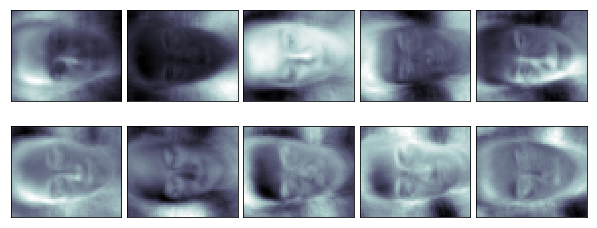

In [43]:
fig = plt.figure(figsize=(8,8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

for i in range(10): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pca.components_[i,:], (46,56)), cmap=plt.cm.bone, interpolation='nearest')

In [44]:
X_train.shape

(416, 2576)

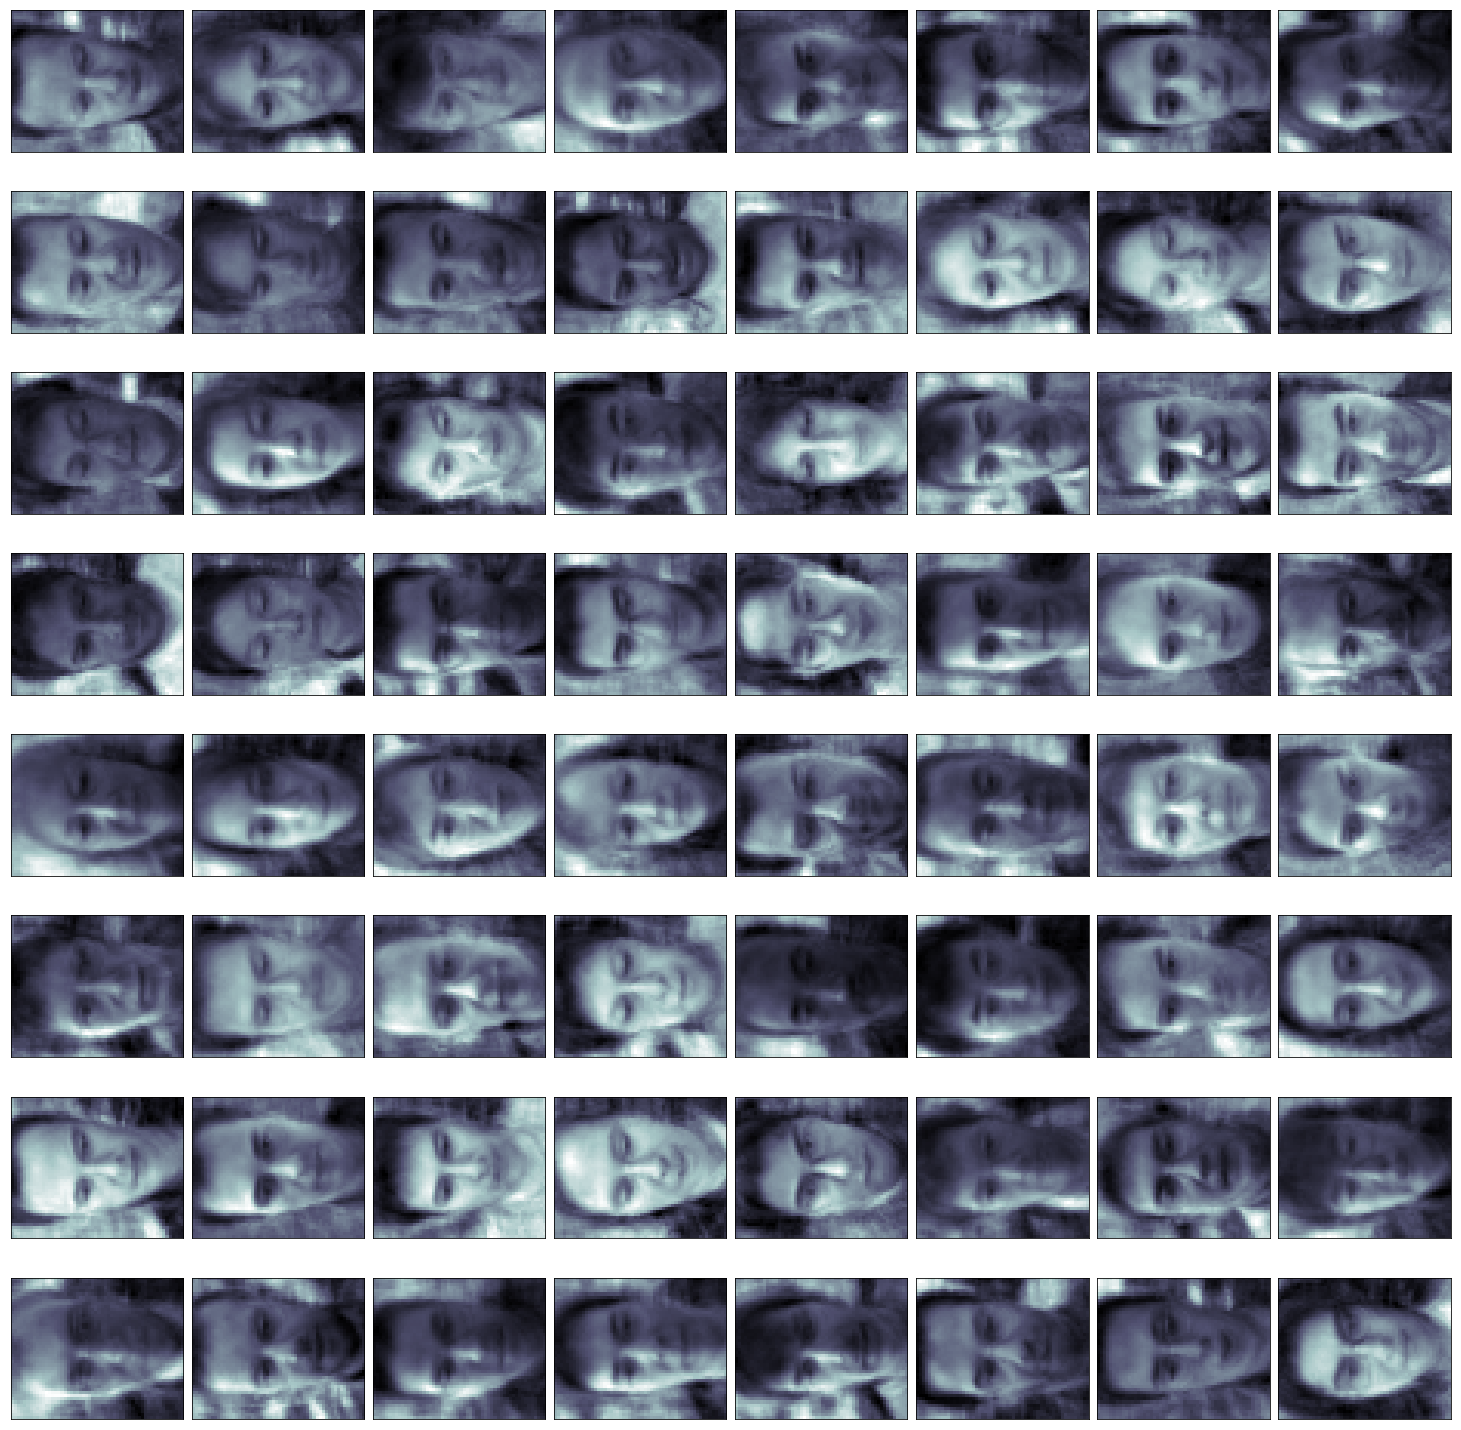

In [48]:
X_inv_proj = pca.inverse_transform(X_proj) 
X_proj_img = np.reshape(X_inv_proj,(416,46,56)) 

fig = plt.figure(figsize=(20,20)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

for i in range(64): 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[]) 
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')

https://timothymonteath.com/monitoring-memory-usage-in-jupyter-notebooks/